# Hierarchically clustered heatmaps
In this tutorial, we start with a proteins dataset and perform hierarchical clustering on the data. Then plot a heatmap where we overlay the clustering tree and color the entries based on their group. This implementation uses internally the [clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html#seaborn-clustermap) plotting function from the Seaborn library.


In [1]:
from omicspylib.analysis.clusters import HierarchicallyClusteredHeatmap
import pandas as pd
import matplotlib.pyplot as plt
from omicspylib import ProteinsDataset
from omicspylib import __version__

print(f'omicspylib version: {__version__}')

omicspylib version: 0.0.8


Load our proteins table containing the protein identifier and the quantitative value per experimental condition.

In [2]:
data = pd.read_csv('data/protein_dataset.tsv', sep='\t')
data.head(2)

,protein_id,c1_rep1,c1_rep2,c1_rep3,c1_rep4,c1_rep5,c2_rep1,c2_rep2,c2_rep3,c2_rep4,c2_rep5,c3_rep1,c3_rep2,c3_rep3,c3_rep4,c3_rep5
0,p0,1748947.964,2655665.55,1812807.047,3179830.747,3002006.748,0.000,1357720.520,0.000,2087116.684,0.000,2558776.479,2655657.487,2115434.782,2889376.029,0.0
1,p1,1689613.957,0.00,1953790.640,2447525.246,2877005.859,1438315.297,1198347.576,1864606.985,0.000,1414141.418,0.000,3070691.996,3149289.453,0.000,2264704.9


To create the heatmap, you need to keep in the table only the quantitative values. The unique identifiers (protein id in this case) should be placed in the index. 

In [3]:
hm_inputs = data.set_index('protein_id')
hm_inputs.head(2)

,c1_rep1,c1_rep2,c1_rep3,c1_rep4,c1_rep5,c2_rep1,c2_rep2,c2_rep3,c2_rep4,c2_rep5,c3_rep1,c3_rep2,c3_rep3,c3_rep4,c3_rep5
protein_id,,,,,,,,,,,,,,,
p0,1748947.964,2655665.55,1812807.047,3179830.747,3002006.748,0.000,1357720.520,0.000,2087116.684,0.000,2558776.479,2655657.487,2115434.782,2889376.029,0.0
p1,1689613.957,0.00,1953790.640,2447525.246,2877005.859,1438315.297,1198347.576,1864606.985,0.000,1414141.418,0.000,3070691.996,3149289.453,0.000,2264704.9


To create the heatmap use the `HierarchicallyClusteredHeatmap` object. It will return a filtered version of the data, a plot object and two lists with the group number of the rows and columns. Returned data might have less rows than the provided dataset, based on the filtering applied. For example, you might want to consider only the cases identified across 5 or more experiments. The unique row identifier is still in the index, so you can join back to the original dataset.

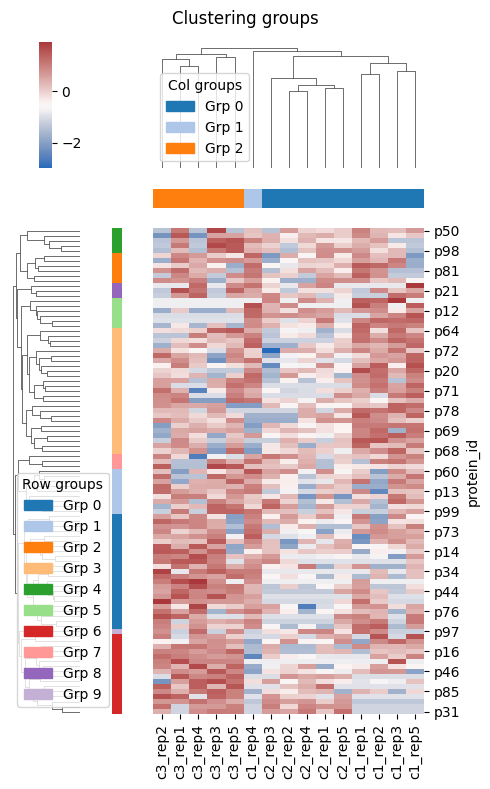

N. rows before: 100
N. rows after: 97
Row group idx: [0, 1, 0, 1, 2, 1, 0, 1, 3, 0, 4, 3, 5, 1, 0, 3, 6, 3, 6, 7, 3, 8, 2, 2, 0, 6, 6, 6, 6, 6, 6, 0, 3, 0, 0, 0, 3, 0, 6, 3, 0, 0, 0, 6, 3, 3, 0, 4, 3, 5, 5, 5, 5, 3, 3, 6, 6, 1, 6, 0, 3, 3, 0, 4, 3, 3, 3, 1, 3, 3, 0, 0, 0, 0, 0, 3, 3, 5, 2, 3, 8, 0, 6, 2, 2, 6, 7, 8, 6, 3, 3, 1, 4, 7, 9, 4, 1]
Col group idx: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2]


In [4]:
heatmap = HierarchicallyClusteredHeatmap(min_frequency=5, n_row_clusters=10, n_col_clusters=3)

result = heatmap.eval(data=hm_inputs, figsize=(5, 8))
plt.show()

print(f'N. rows before: {hm_inputs.shape[0]}')
print(f'N. rows after: {result.filtered_data.shape[0]}')
print(f'Row group idx: {result.row_groups}')
print(f'Col group idx: {result.col_groups}')

Alternatively your data are wrapped around a `ProteinsDataset` object, you can extract the table and proceed. 

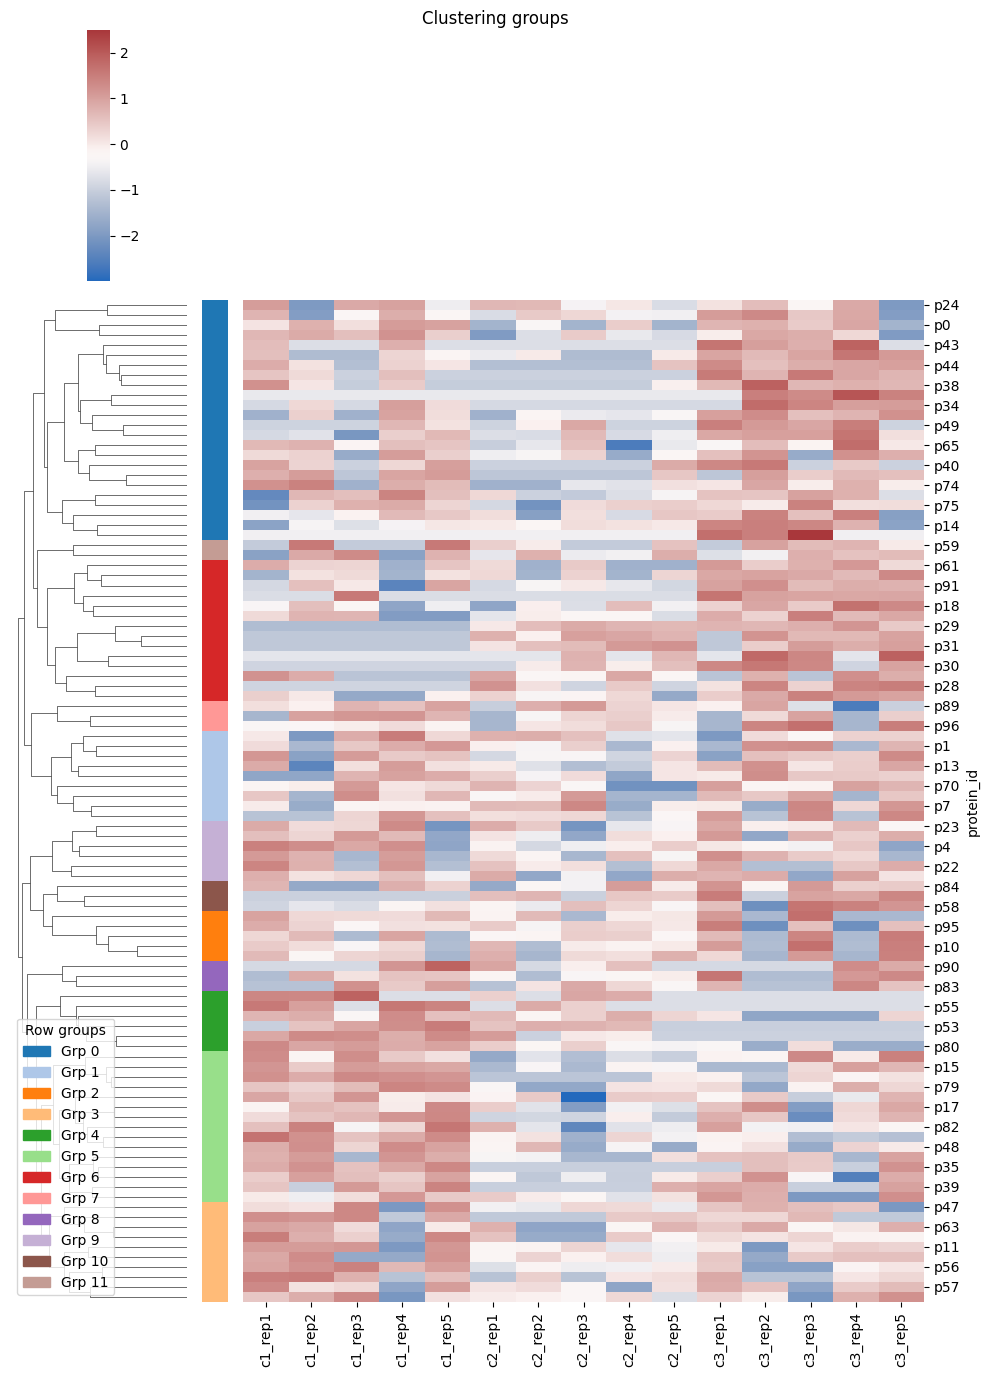

In [5]:
conditions = {
    'c1': [f'c1_rep{i+1}' for i in range(5)],
    'c2': [f'c2_rep{i+1}' for i in range(5)],
    'c3': [f'c3_rep{i+1}' for i in range(5)],
}
dataset = ProteinsDataset.from_df(data, id_col='protein_id', conditions=conditions)
data_in = dataset.to_table()

heatmap = HierarchicallyClusteredHeatmap(n_col_clusters=None)
result = heatmap.eval(data=data_in)
# plt.savefig('my-plot.png')  # save as image
# plt.savefig('my-plot.pdf')  # save as vector-based image
plt.show()